## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_FD003.txt', sep=" ", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,NaN,NaN
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,NaN,NaN
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,NaN,NaN
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,NaN,NaN


## The last two columns have values as NaN so we need to drop them.

In [3]:
# Create a list of column indices to drop
columns_to_drop = [27, 26]

# Drop the columns from the DataFrame
df = df.drop(df.columns[columns_to_drop], axis=1)

df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [4]:
df.columns = df.columns.astype(str)
column_names = df.columns
print(column_names)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25'],
      dtype='object')


## We need to rename these columns to actual column names.

In [5]:
new_column_names = {
    '0': 'Engine_Unit_Number',
    '1': 'Time_In_Cycles',
    '2': 'Operating_settings_1',
    '3': 'Operating_settings_2',
    '4': 'Operating_settings_3',
    '5': 'Sensor_readings_1',
    '6': 'Sensor_readings_2',
    '7': 'Sensor_readings_3',
    '8': 'Sensor_readings_4',
    '9': 'Sensor_readings_5',
    '10': 'Sensor_readings_6',
    '11': 'Sensor_readings_7',
    '12': 'Sensor_readings_8',
    '13': 'Sensor_readings_9',
    '14': 'Sensor_readings_10',
    '15': 'Sensor_readings_11',
    '16': 'Sensor_readings_12',
    '17': 'Sensor_readings_13',
    '18': 'Sensor_readings_14',
    '19': 'Sensor_readings_15',
    '20': 'Sensor_readings_16',
    '21': 'Sensor_readings_17',
    '22': 'Sensor_readings_18',
    '23': 'Sensor_readings_19',
    '24': 'Sensor_readings_20',
    '25': 'Sensor_readings_21'
}

df = df.rename(columns=new_column_names)


In [6]:
df.describe()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,2.472000e+04,24720.000000,24720.000000,24720.000000,2.472000e+04,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,48.631877,139.077063,-0.000024,0.000005,100.0,5.186700e+02,642.457858,1588.079175,1404.471212,1.462000e+01,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,29.348985,98.846675,0.002194,0.000294,0.0,6.684921e-11,0.523031,6.810418,9.773178,3.602525e-12,...,3.255314,0.158121,16.504118,0.060512,1.750371e-14,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,1.000000,-0.008600,-0.000600,100.0,5.186700e+02,640.840000,1564.300000,1377.060000,1.462000e+01,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.080000,1583.280000,1397.187500,1.462000e+01,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,47.000000,124.000000,0.000000,-0.000000,100.0,5.186700e+02,642.400000,1587.520000,1402.910000,1.462000e+01,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,74.000000,191.000000,0.001500,0.000300,100.0,5.186700e+02,642.790000,1592.412500,1410.600000,1.462000e+01,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,100.000000,525.000000,0.008600,0.000700,100.0,5.186700e+02,645.110000,1615.390000,1441.160000,1.462000e+01,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


#### We can drop the sensor readings with a standard deviation of 0 and create a new dataframe to facilitate experimentation and analysis.

In [7]:
df.std()

Engine_Unit_Number      2.934899e+01
Time_In_Cycles          9.884668e+01
Operating_settings_1    2.193545e-03
Operating_settings_2    2.940429e-04
Operating_settings_3    0.000000e+00
Sensor_readings_1       6.684921e-11
Sensor_readings_2       5.230311e-01
Sensor_readings_3       6.810418e+00
Sensor_readings_4       9.773178e+00
Sensor_readings_5       3.602525e-12
Sensor_readings_6       1.811600e-02
Sensor_readings_7       3.437343e+00
Sensor_readings_8       1.582849e-01
Sensor_readings_9       1.998029e+01
Sensor_readings_10      3.484849e-03
Sensor_readings_11      3.000742e-01
Sensor_readings_12      3.255314e+00
Sensor_readings_13      1.581207e-01
Sensor_readings_14      1.650412e+01
Sensor_readings_15      6.051161e-02
Sensor_readings_16      1.750371e-14
Sensor_readings_17      1.761459e+00
Sensor_readings_18      0.000000e+00
Sensor_readings_19      0.000000e+00
Sensor_readings_20      2.488647e-01
Sensor_readings_21      1.492338e-01
dtype: float64

Note that sensors 18 and 19 have very little fluctuation

In [8]:
# Dropping columns
drop_columns = ['Sensor_readings_18', 'Sensor_readings_19']
df = df.drop(drop_columns, axis = 1)
df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_10,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,1.3,47.30,522.31,2388.01,8145.32,8.4246,0.03,391,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,1.3,47.23,522.42,2388.03,8152.85,8.4403,0.03,392,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,1.3,47.22,522.03,2388.00,8150.17,8.3901,0.03,391,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,1.3,47.24,522.49,2388.08,8146.56,8.3878,0.03,392,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,1.3,47.15,522.58,2388.03,8147.80,8.3869,0.03,392,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,1.3,48.27,519.66,2388.30,8138.08,8.5036,0.03,394,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,1.3,48.13,519.91,2388.28,8144.36,8.5174,0.03,395,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,1.3,48.18,519.44,2388.24,8135.95,8.5223,0.03,396,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,1.3,48.05,520.01,2388.26,8141.24,8.5148,0.03,395,38.31,23.0753


In [9]:
def add_remaining_useful_life(df):
    # Getting the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="Engine_Unit_Number")
    max_cycle = grouped_by_unit["Time_In_Cycles"].max()

    # Merging the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='Engine_Unit_Number', right_index=True)

    # Calculating remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Time_In_Cycles"]
    result_frame["RUL"] = remaining_useful_life

    # dropping max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

df = add_remaining_useful_life(df)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,47.30,522.31,2388.01,8145.32,8.4246,0.03,391,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,47.23,522.42,2388.03,8152.85,8.4403,0.03,392,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,47.22,522.03,2388.00,8150.17,8.3901,0.03,391,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,47.24,522.49,2388.08,8146.56,8.3878,0.03,392,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,47.15,522.58,2388.03,8147.80,8.3869,0.03,392,39.14,23.4583,254


# **Data Visualisations**

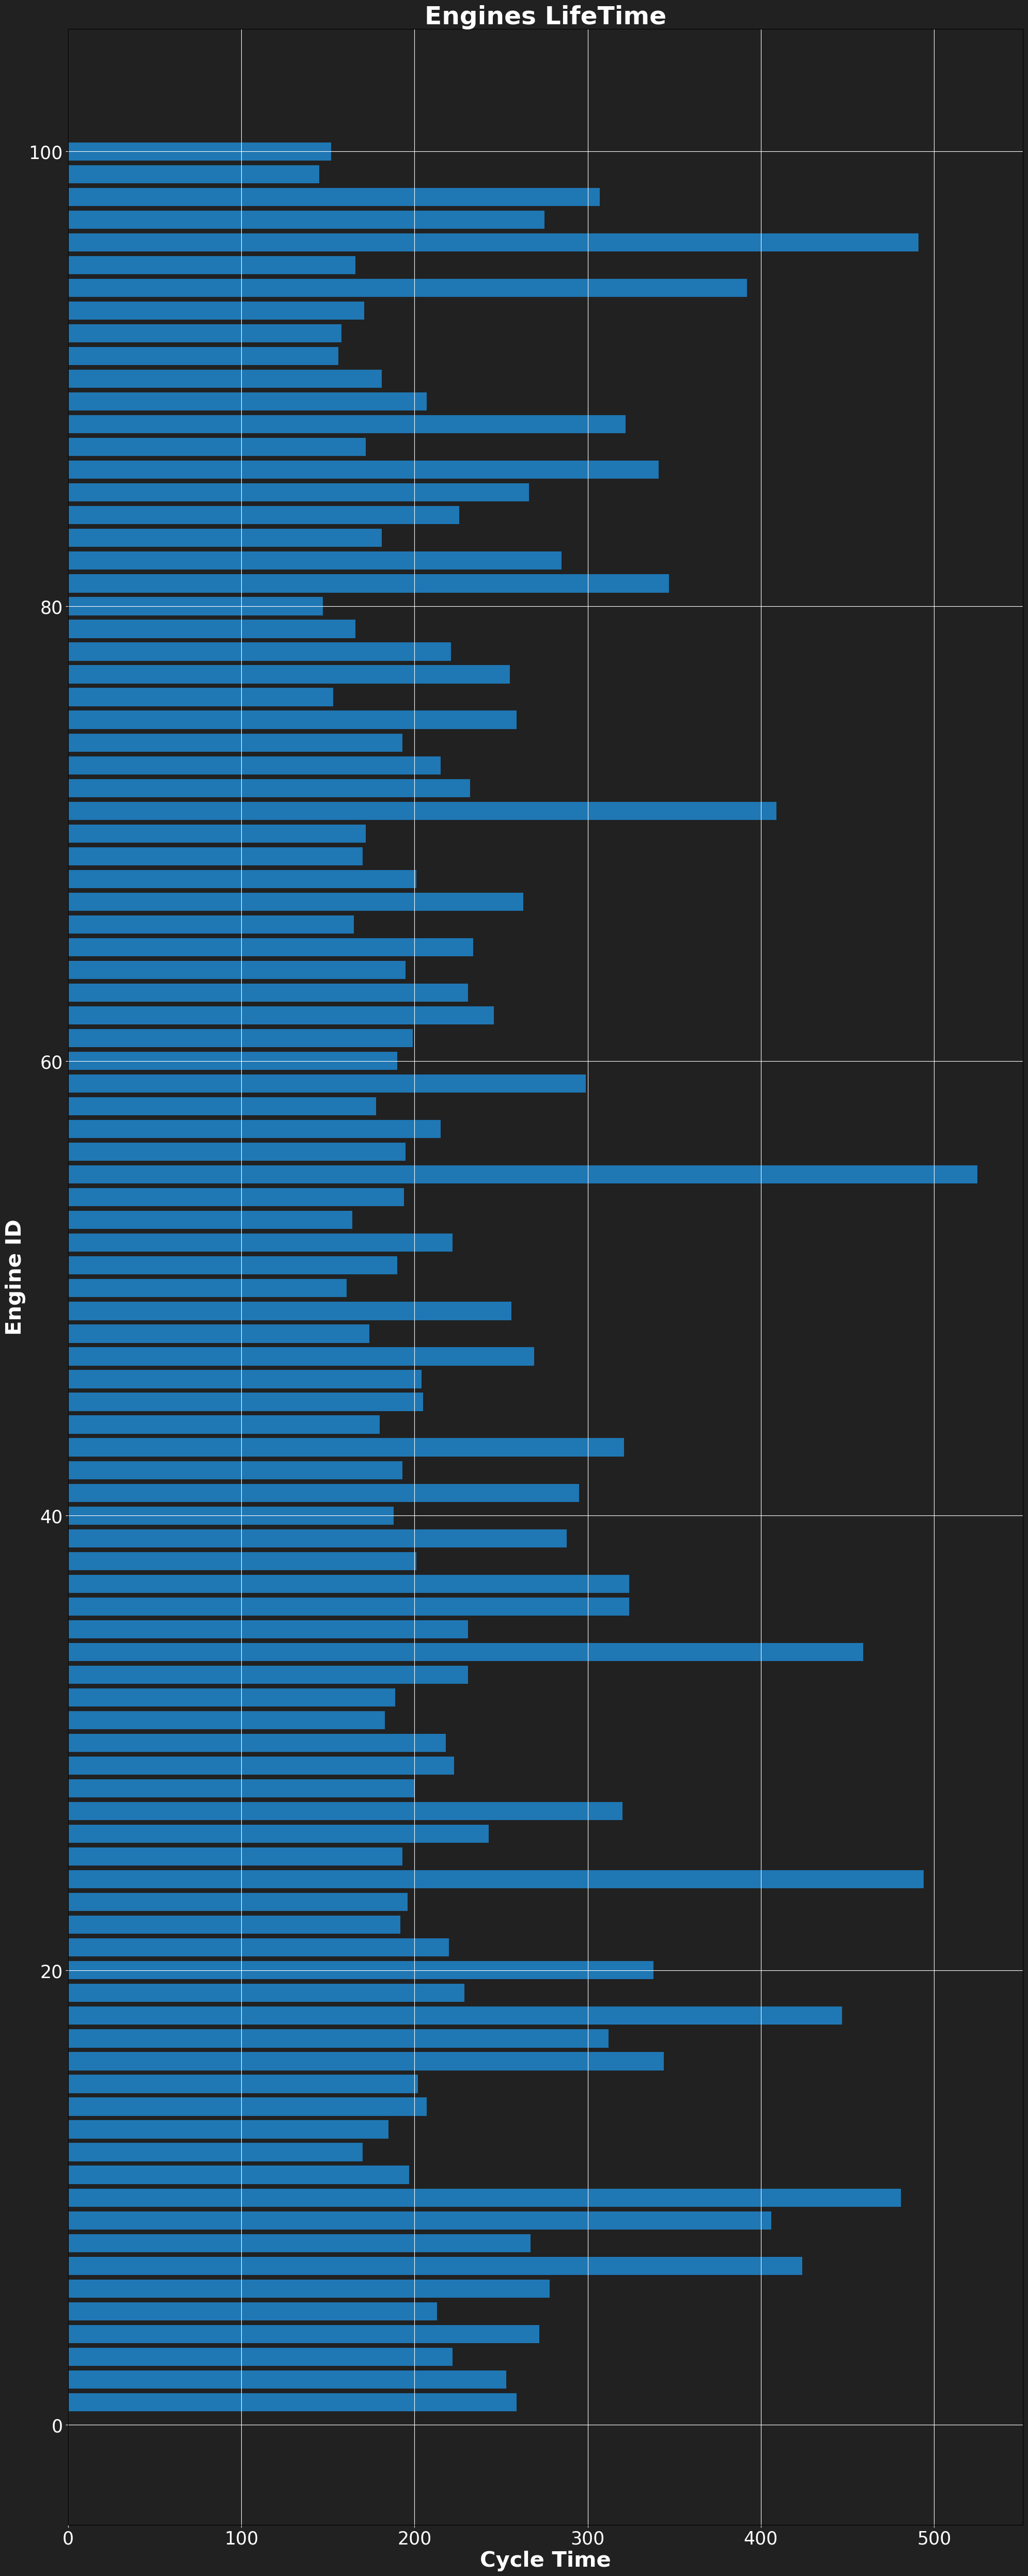

In [10]:
import matplotlib.pyplot as plt

# Create the figure and axes with a specific size
fig, ax = plt.subplots(figsize=(20, 50))

# Set the background color
fig.patch.set_facecolor('#212121')  # Set a specific color code for the background
ax.set_facecolor('#212121')

# Group the dataframe by 'Engine_Unit_Number' and find the maximum 'Time_In_Cycles' for each group
engine_cycles = df.groupby('Engine_Unit_Number')['Time_In_Cycles'].max()

# Plot the horizontal bar chart
ax.barh(engine_cycles.index, engine_cycles, height=0.8, align='center')

# Set the title and axis labels
ax.set_title('Engines LifeTime', fontweight='bold', size=35, color='white')
ax.set_xlabel('Cycle Time', fontweight='bold', size=30, color='white')
ax.set_ylabel('Engine ID', fontweight='bold', size=30, color='white')

# Set the tick labels font size and color
ax.tick_params(axis='both', labelsize=25, colors='white')

# Enable gridlines
ax.grid(True, color='white')

# Adjust the layout for better spacing
fig.tight_layout()

# Display the plot
plt.show()


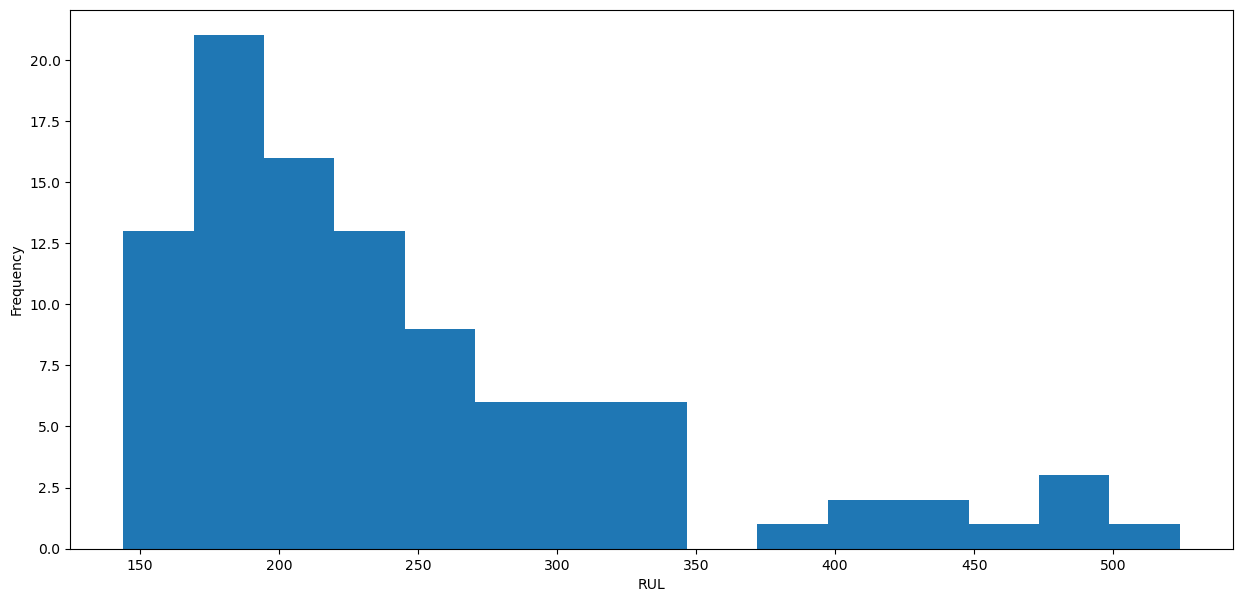

In [11]:
# Calculate the maximum RUL for each engine unit number
df_max_rul = df.groupby('Engine_Unit_Number')['RUL'].max()

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the histogram of RUL values
ax.hist(df_max_rul, bins=15)

# Set the x-axis and y-axis labels
ax.set_xlabel('RUL')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor(sensor_name):
    fig, ax = plt.subplots(figsize=(13, 5))

    for engine_num in range(0, df['Engine_Unit_Number'].nunique(), 10):
        engine_data = df[df['Engine_Unit_Number'] == engine_num]
        ax.plot(engine_data['RUL'], engine_data[sensor_name])

    ax.set_xlim(250, 0)
    ax.set_xticks(np.arange(0, 275, 25))
    ax.set_ylabel(sensor_name)
    ax.set_xlabel('Remaining Useful Life')

    plt.show()


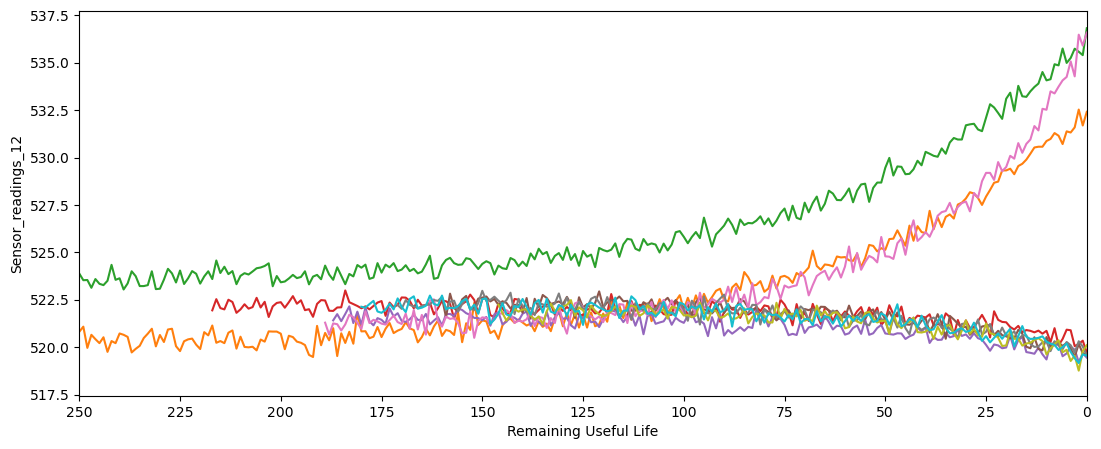

In [13]:
plot_sensor("Sensor_readings_12")

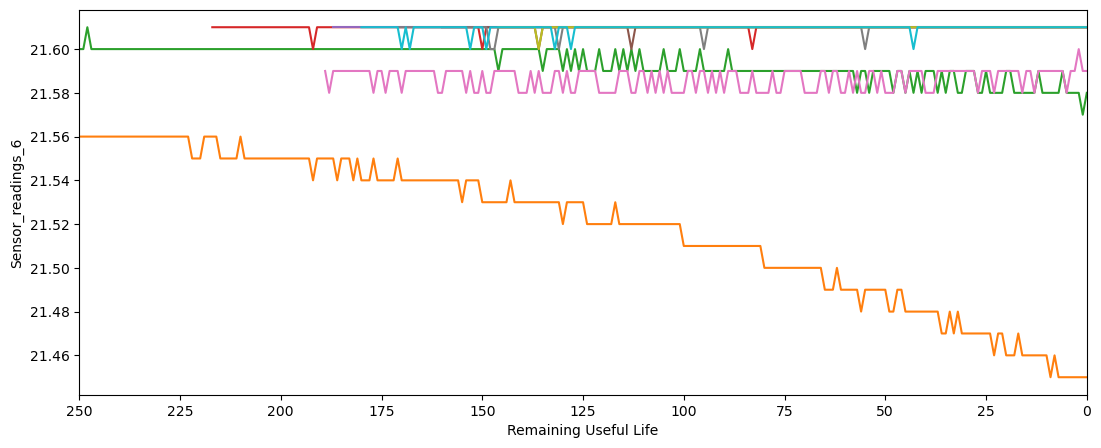

In [14]:
plot_sensor("Sensor_readings_6")

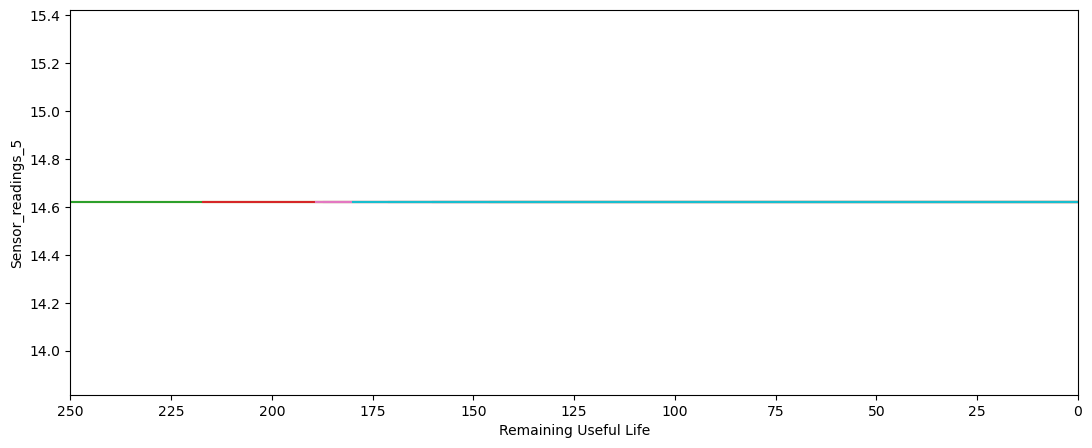

In [15]:
plot_sensor("Sensor_readings_5")

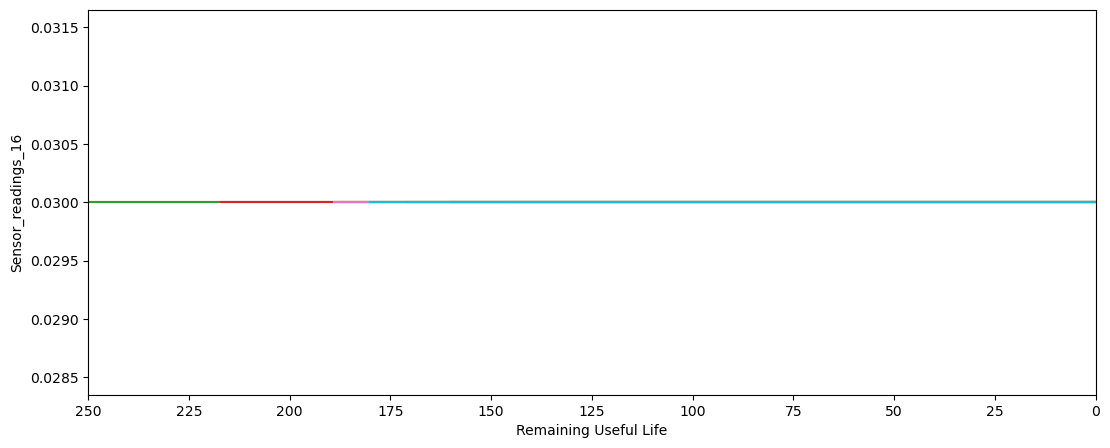

In [16]:
plot_sensor("Sensor_readings_16")

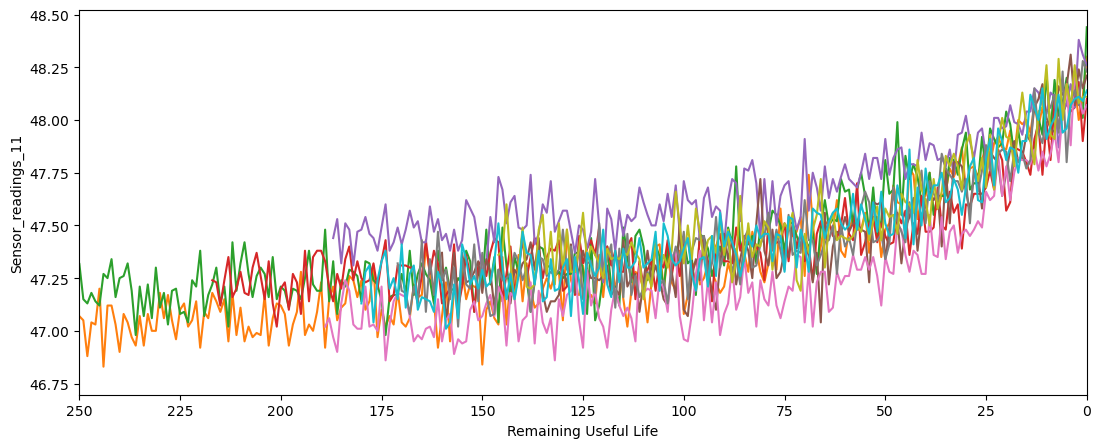

In [18]:
plot_sensor("Sensor_readings_11")

In [19]:
drop_columns = ['Sensor_readings_5', 'Sensor_readings_16']
df = df.drop(drop_columns, axis = 1)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_6,...,Sensor_readings_10,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,21.61,...,1.3,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,21.61,...,1.3,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,21.61,...,1.3,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,21.61,...,1.3,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,21.61,...,1.3,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583,254


### Normalization

In [21]:
# Selecting columns for normalization
columns_to_normalize = ['Operating_settings_1',	'Operating_settings_2',	'Operating_settings_3','Sensor_readings_1',	'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8', 'Sensor_readings_9',	'Sensor_readings_10',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21']

# Extracting the columns to be normalized
columns_data = df[columns_to_normalize]

# Performing the Min-Max normalization on selected columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(columns_data)

# Updating the DataFrame with normalized values
df[columns_to_normalize] = normalized_data

df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_6,...,Sensor_readings_10,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,0.470930,0.769231,0.0,0.0,0.355972,0.370523,0.308580,21.61,...,0.333333,0.348571,0.231279,0.642857,0.239116,0.647755,0.272727,0.559524,0.446331,258
1,1,2,0.546512,0.230769,0.0,0.0,0.388759,0.399100,0.309360,21.61,...,0.333333,0.308571,0.236882,0.654762,0.278567,0.685659,0.363636,0.488095,0.534836,257
2,1,3,0.418605,0.307692,0.0,0.0,0.313817,0.353298,0.445398,21.61,...,0.333333,0.302857,0.217015,0.636905,0.264526,0.564462,0.272727,0.404762,0.458577,256
3,1,4,0.383721,0.538462,0.0,0.0,0.487119,0.417107,0.237285,21.61,...,0.333333,0.314286,0.240448,0.684524,0.245612,0.558909,0.363636,0.470238,0.391966,255
4,1,5,0.593023,0.461538,0.0,0.0,0.196721,0.476218,0.321217,21.61,...,0.333333,0.262857,0.245033,0.654762,0.252109,0.556736,0.363636,0.577381,0.543371,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,0.406977,0.230769,0.0,0.0,0.688525,0.620669,0.734009,21.61,...,0.333333,0.902857,0.096281,0.815476,0.201184,0.838484,0.545455,0.160714,0.083960,4
24716,100,149,0.697674,0.230769,0.0,0.0,0.573770,0.627912,0.812480,21.61,...,0.333333,0.822857,0.109017,0.803571,0.234086,0.871801,0.636364,0.196429,0.094628,3
24717,100,150,0.406977,0.769231,0.0,0.0,0.702576,0.787434,0.847894,21.61,...,0.333333,0.851429,0.085074,0.779762,0.190025,0.883631,0.727273,0.130952,0.181464,2
24718,100,151,0.366279,0.769231,0.0,0.0,0.725995,0.651008,0.772387,21.61,...,0.333333,0.777143,0.114111,0.791667,0.217740,0.865524,0.636364,0.083333,0.188051,1


In [22]:
# Grouping the DataFrame by the 'Engine_Unit_Number' column
grouped = df.groupby('Engine_Unit_Number')

# Iterating over the groups and creating individual DataFrames
individual_dfxstd = []
for group_name, group_df in grouped:
    individual_dfxstd.append(group_df)

individual_dfxstd[1]

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_6,...,Sensor_readings_10,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
259,2,1,0.697674,0.692308,0.0,0.0,0.360656,0.462909,0.258814,21.58,...,0.333333,0.245714,0.193072,0.607143,0.181275,0.458474,0.363636,0.517857,0.451062,252
260,2,2,0.680233,0.692308,0.0,0.0,0.248244,0.287140,0.304680,21.58,...,0.333333,0.188571,0.214468,0.660714,0.209200,0.589329,0.272727,0.470238,0.552649,251
261,2,3,0.459302,0.846154,0.0,0.0,0.236534,0.383832,0.224649,21.57,...,0.333333,0.337143,0.212939,0.613095,0.162257,0.509899,0.363636,0.452381,0.473049,250
262,2,4,0.784884,0.153846,0.0,0.0,0.288056,0.297710,0.224961,21.58,...,0.333333,0.257143,0.170657,0.607143,0.208990,0.532834,0.090909,0.404762,0.462009,249
263,2,5,0.517442,0.384615,0.0,0.0,0.309133,0.384811,0.290484,21.58,...,0.333333,0.085714,0.196128,0.601190,0.187143,0.499759,0.272727,0.630952,0.502644,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,249,0.441860,0.538462,0.0,0.0,0.428571,0.668624,0.718097,21.58,...,0.666667,0.725714,0.867550,0.940476,0.471368,0.216562,0.818182,0.928571,0.786344,4
508,2,250,0.505814,0.384615,0.0,0.0,0.489461,0.761597,0.772075,21.58,...,0.666667,0.731429,0.919511,0.976190,0.450621,0.202801,0.727273,0.767857,0.789498,3
509,2,251,0.296512,0.846154,0.0,0.0,0.653396,0.674496,0.806396,21.58,...,1.000000,0.885714,0.921549,0.946429,0.468015,0.233221,0.727273,0.904762,0.860469,2
510,2,252,0.290698,0.615385,0.0,0.0,0.590164,0.768644,0.643058,21.58,...,0.666667,0.851429,0.868059,0.928571,0.451564,0.230082,0.727273,0.815476,0.872715,1


# Training on various types of Models

In [37]:
x = df[['Operating_settings_1',	'Operating_settings_2',	'Operating_settings_3',	'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8',	'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21']]
y = df['RUL']

## **Linear Regression**

In [38]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [39]:
x_train_lr

,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
11044,0.377907,0.230769,0.0,0.489461,0.488745,0.393448,0.450192,0.735294,0.281509,0.440000,0.449312,0.714286,0.295541,0.521004,0.454545,0.678571,0.610725
15005,0.604651,0.384615,0.0,0.138173,0.404189,0.282839,0.296456,0.670588,0.176226,0.382857,0.322466,0.654762,0.216273,0.565427,0.363636,0.517857,0.582893
5751,0.517442,0.692308,0.0,0.285714,0.493051,0.292356,0.243774,0.635294,0.178907,0.320000,0.230260,0.660714,0.193797,0.526799,0.363636,0.517857,0.547082
22627,0.558140,0.769231,0.0,0.372365,0.488550,0.438534,0.217433,0.652941,0.179877,0.262857,0.200713,0.642857,0.213810,0.632062,0.363636,0.452381,0.572595
22861,0.593023,0.307692,0.0,0.379391,0.385203,0.276131,0.335249,0.676471,0.194389,0.337143,0.365767,0.684524,0.237387,0.497827,0.454545,0.666667,0.578996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.656977,0.615385,0.0,0.451991,0.591309,0.604368,0.152299,0.694118,0.366363,0.645714,0.161488,0.714286,0.347566,0.750121,0.545455,0.285714,0.369886
5390,0.441860,0.769231,0.0,0.306792,0.376003,0.321061,0.298851,0.652941,0.204881,0.137143,0.272542,0.648810,0.186043,0.486963,0.181818,0.565476,0.497078
860,0.610465,0.384615,0.0,0.334895,0.468976,0.597192,0.204502,0.700000,0.164856,0.468571,0.175242,0.732143,0.167863,0.823757,0.545455,0.267857,0.343909
15795,0.569767,0.615385,0.0,0.372365,0.325113,0.349454,0.244732,0.641176,0.167306,0.302857,0.256240,0.619048,0.206423,0.569773,0.181818,0.500000,0.417015


In [40]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train_lr, y_train_lr)

LinearRegression()

In [41]:
y_pred_lr = reg.predict(x_test_lr)
y_pred_lr[y_pred_lr <= 0] = 0
# y_pred_lr = y_pred_lr.flatten()
y_pred_lr

array([ 76.92665702, 188.05830378,  98.57467417, ...,  97.23811921,
       202.09748506, 185.39985721])

In [42]:
results = pd.DataFrame({'Actual': y_test_lr, 'Predicted': y_pred_lr})
results

,Actual,Predicted
2501,92,76.926657
19936,189,188.058304
4645,46,98.574674
1661,259,231.131001
9849,296,225.618172
...,...,...
19495,136,163.501117
2814,260,239.730266
6271,42,97.238119
1697,223,202.097485


In [43]:
from sklearn.metrics import mean_squared_error
# Calculating mean squared error
mse = mean_squared_error(y_test_lr, y_pred_lr)

# Calculating root mean squared error
rmse = np.sqrt(mse)

# Printing the result
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 62.28729098907106


## Artificial Neural Networks

### **Iteration 1**

In [44]:
x_train_ann_1, x_test_ann_1, y_train_ann_1, y_test_ann_1 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [45]:
input_shape_train = x_train_ann_1.shape[1]
input_shape_test = x_test_ann_1.shape[1]

print("Input shape of training set is", input_shape_train)
print("Input shape of testing set is", input_shape_test)

Input shape of training set is 17
Input shape of testing set is 17


In [46]:
x_train_ann_1

,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
11044,0.377907,0.230769,0.0,0.489461,0.488745,0.393448,0.450192,0.735294,0.281509,0.440000,0.449312,0.714286,0.295541,0.521004,0.454545,0.678571,0.610725
15005,0.604651,0.384615,0.0,0.138173,0.404189,0.282839,0.296456,0.670588,0.176226,0.382857,0.322466,0.654762,0.216273,0.565427,0.363636,0.517857,0.582893
5751,0.517442,0.692308,0.0,0.285714,0.493051,0.292356,0.243774,0.635294,0.178907,0.320000,0.230260,0.660714,0.193797,0.526799,0.363636,0.517857,0.547082
22627,0.558140,0.769231,0.0,0.372365,0.488550,0.438534,0.217433,0.652941,0.179877,0.262857,0.200713,0.642857,0.213810,0.632062,0.363636,0.452381,0.572595
22861,0.593023,0.307692,0.0,0.379391,0.385203,0.276131,0.335249,0.676471,0.194389,0.337143,0.365767,0.684524,0.237387,0.497827,0.454545,0.666667,0.578996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.656977,0.615385,0.0,0.451991,0.591309,0.604368,0.152299,0.694118,0.366363,0.645714,0.161488,0.714286,0.347566,0.750121,0.545455,0.285714,0.369886
5390,0.441860,0.769231,0.0,0.306792,0.376003,0.321061,0.298851,0.652941,0.204881,0.137143,0.272542,0.648810,0.186043,0.486963,0.181818,0.565476,0.497078
860,0.610465,0.384615,0.0,0.334895,0.468976,0.597192,0.204502,0.700000,0.164856,0.468571,0.175242,0.732143,0.167863,0.823757,0.545455,0.267857,0.343909
15795,0.569767,0.615385,0.0,0.372365,0.325113,0.349454,0.244732,0.641176,0.167306,0.302857,0.256240,0.619048,0.206423,0.569773,0.181818,0.500000,0.417015


In [47]:
y_train_ann_1

11044     73
15005    257
5751     174
22627    164
22861    322
        ... 
21575     21
5390     315
860      145
15795    102
23654    186
Name: RUL, Length: 17304, dtype: int64

In [48]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import losses
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [49]:
learning_rate = 0.1

model = Sequential()

model.add(Dense(units = 25, activation = 'tanh', input_shape = (17,))) #kernel_initializer = 'normal'
model.add(Dense(units = 15, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 10, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 5, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 1, activation = 'relu')) #kernel_initializer = 'normal'

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 25)                450       
                                                                 
 dense_6 (Dense)             (None, 15)                390       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [50]:
# loss function
rmse = RootMeanSquaredError()
mse = MeanSquaredError()
# msle = MeanSquaredLogarithmicError()

model.compile(
    loss = mse,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [rmse]
)

# training the model
history = model.fit(
    x_train_ann_1,
    y_train_ann_1,
    epochs=50,
    batch_size=64,
    #validation_split=0.2
)

Epoch 1/50
271/271 [==============================] - 3s 3ms/step - loss: 15744.2500 - root_mean_squared_error: 125.4761
Epoch 2/50
271/271 [==============================] - 1s 2ms/step - loss: 9863.4785 - root_mean_squared_error: 99.3150
Epoch 3/50
271/271 [==============================] - 1s 2ms/step - loss: 9754.1377 - root_mean_squared_error: 98.7630
Epoch 4/50
271/271 [==============================] - 1s 2ms/step - loss: 9753.0293 - root_mean_squared_error: 98.7574
Epoch 5/50
271/271 [==============================] - 1s 3ms/step - loss: 9754.9062 - root_mean_squared_error: 98.7669
Epoch 6/50
271/271 [==============================] - 1s 2ms/step - loss: 9755.3135 - root_mean_squared_error: 98.7690
Epoch 7/50
271/271 [==============================] - 1s 3ms/step - loss: 9753.6953 - root_mean_squared_error: 98.7608
Epoch 8/50
271/271 [==============================] - 1s 2ms/step - loss: 9755.6660 - root_mean_squared_error: 98.7708
Epoch 9/50
271/271 [==========================

In [51]:
y_pred_ann_1 = model.predict(x_test_ann_1)
pd.DataFrame(y_pred_ann_1)

232/232 [==============================] - 1s 2ms/step


,0
0,138.604614
1,138.604614
2,138.604614
3,138.604614
4,138.604614
...,...
7411,138.604614
7412,138.604614
7413,138.604614
7414,138.604614


In [52]:
pd.DataFrame(y_test_ann_1)

,RUL
2501,92
19936,189
4645,46
1661,259
9849,296
...,...
19495,136
2814,260
6271,42
1697,223


### **Iteration 2**

In [53]:
x_train_ann_2, x_test_ann_2, y_train_ann_2, y_test_ann_2 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [54]:
input_shape_train = x_train_ann_2.shape[1]
input_shape_test = x_test_ann_2.shape[1]

print("Input shape of training set is", input_shape_train)
print("Input shape of testing set is", input_shape_test)

Input shape of training set is 17
Input shape of testing set is 17


In [55]:
learning_rate = 0.1

model = Sequential()

model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_shape = (17,)))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'leaky_relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 15)                270       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [56]:
# loss function
rmse = RootMeanSquaredError()
mse = MeanSquaredError()
# msle = MeanSquaredLogarithmicError()

model.compile(
    loss = mse,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [rmse]
)

# training the model
history = model.fit(
    x_train_ann_2,
    y_train_ann_2,
    epochs=50,
    batch_size=64,
    #validation_split=0.2
)

Epoch 1/50
271/271 [==============================] - 2s 4ms/step - loss: 16041.7646 - root_mean_squared_error: 126.6561
Epoch 2/50
271/271 [==============================] - 1s 3ms/step - loss: 9871.6123 - root_mean_squared_error: 99.3560
Epoch 3/50
271/271 [==============================] - 1s 3ms/step - loss: 9753.5215 - root_mean_squared_error: 98.7599
Epoch 4/50
271/271 [==============================] - 1s 2ms/step - loss: 9752.8252 - root_mean_squared_error: 98.7564
Epoch 5/50
271/271 [==============================] - 1s 2ms/step - loss: 9753.9912 - root_mean_squared_error: 98.7623
Epoch 6/50
271/271 [==============================] - 1s 2ms/step - loss: 9753.8154 - root_mean_squared_error: 98.7614
Epoch 7/50
271/271 [==============================] - 1s 2ms/step - loss: 9753.9492 - root_mean_squared_error: 98.7621
Epoch 8/50
271/271 [==============================] - 1s 2ms/step - loss: 9755.3125 - root_mean_squared_error: 98.7690
Epoch 9/50
271/271 [==========================

In [57]:
y_pred_ann_2 = model.predict(x_test_ann_2)
pd.DataFrame(y_pred_ann_2)

232/232 [==============================] - 0s 1ms/step


,0
0,139.554932
1,139.554932
2,139.554932
3,139.554932
4,139.554932
...,...
7411,139.554932
7412,139.554932
7413,139.554932
7414,139.554932


In [58]:
pd.DataFrame(y_test_ann_2)

,RUL
2501,92
19936,189
4645,46
1661,259
9849,296
...,...
19495,136
2814,260
6271,42
1697,223
